# 1 - Imports

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from IPython.display import Image

ModuleNotFoundError: No module named 'folium'

In [4]:
filterwarnings('ignore')

pd.set_option('display.max_columns', None)

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [18, 8]

sns.set;

## 1.1 - Funções

In [33]:
def price_mean(df, colunas):
    dfg = df.groupby(colunas, as_index=False)['price'].mean()
    return dfg

## 1.2 - Importando os dados

In [5]:
df = pd.read_csv('kc_house_data.csv')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 2 - Descrição dos dados

In [7]:
df2 = df.copy()

In [8]:
print(f'Quantidade de linhas: {df2.shape[0]}')
print(f'Quantidade de colunas: {df2.shape[1]}')

Quantidade de linhas: 21613
Quantidade de colunas: 21


## 2.1 - Dados nulos

In [9]:
df2.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 2.2 - Tipo dos dados

In [10]:
df2['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df2.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 2.3 - Análise Descritiva

### 2.3.1 - Análise Numérica

In [11]:
num = df2.drop('date', axis=1)
num.describe().apply(lambda x: x.apply('{0:.3f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
id,21613.000,4580301520.865,2876565571.312,1000102.000,2123049194.000,3904930410.000,7308900445.000,9900000190.000
price,21613.000,540088.142,367127.196,75000.000,321950.000,450000.000,645000.000,7700000.000
bedrooms,21613.000,3.371,0.930,0.000,3.000,3.000,4.000,33.000
bathrooms,21613.000,2.115,0.770,0.000,1.750,2.250,2.500,8.000
sqft_living,21613.000,2079.900,918.441,290.000,1427.000,1910.000,2550.000,13540.000
sqft_lot,21613.000,15106.968,41420.512,520.000,5040.000,7618.000,10688.000,1651359.000
floors,21613.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,21613.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21613.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21613.000,3.409,0.651,1.000,3.000,3.000,4.000,5.000


# 3 - Feature Engineering

In [79]:
df3 = df2.copy()

# 3.1 - Mapa Mental

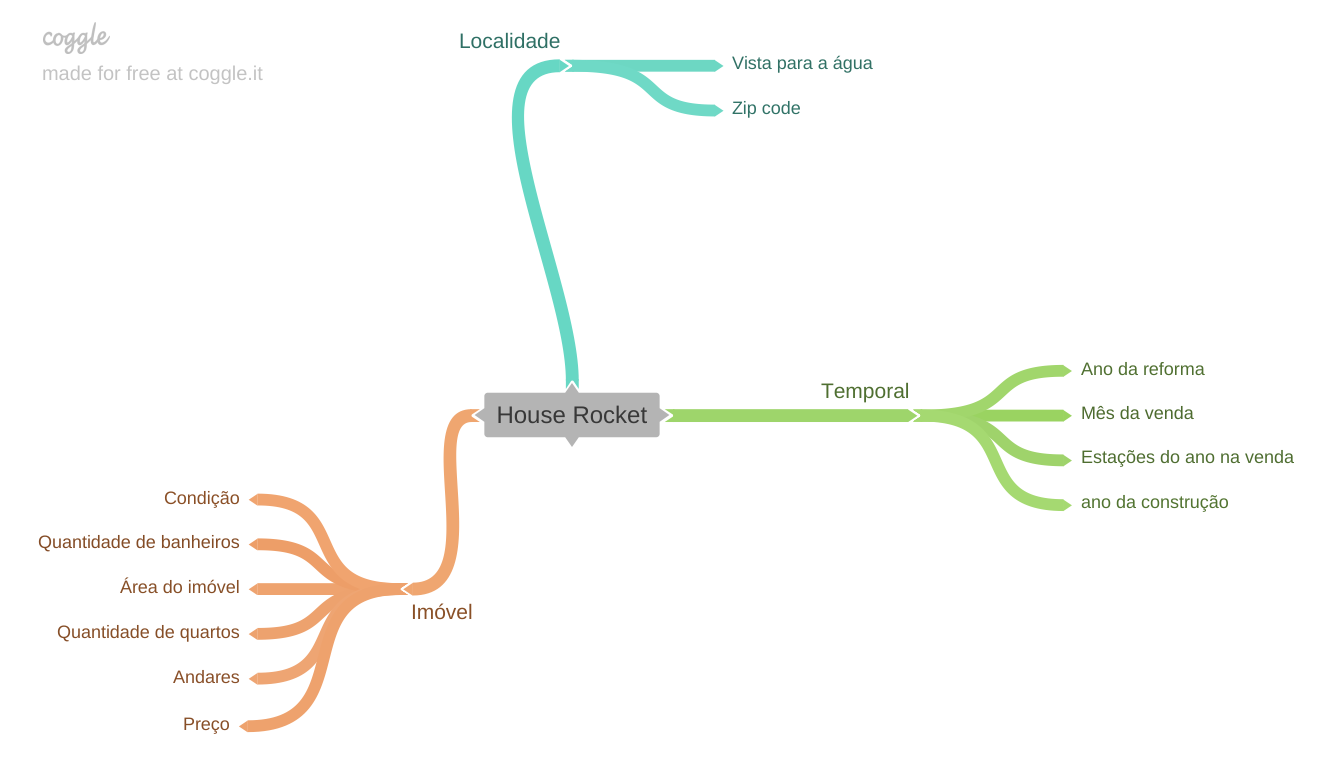

In [13]:
Image('img/House_rocket.png')

## 3.2 - Feature Engineering

In [101]:
df3['month_date'] = df3['date'].dt.month
df3['month_date_str'] = df3['month_date'].apply(lambda x: '%02d' % x if x < 10 else x)
df3['year_date'] = df3['date'].dt.year
df3['year_month'] = df3['year_date'].astype(str) + '-' + df3['month_date_str'].astype(str)

df3['season'] = df3['month_date'].apply(lambda x: 
                                            'verao' if (x >= 6) & (x <= 8) else
                                            'outono' if (x >= 9) & (x <= 11) else
                                            'primavera' if (x >= 3) & (x <= 5) else 'inverno')

df3['comodos'] = 'banheiros: ' + df3['bathrooms'].astype(str) + ' / ' + 'quartos: ' + df3['bedrooms'].astype(str)

# 4 - Análise Exploratória de Dados (EDA)

In [103]:
df4 = df3.copy()

## 4.1 - Análise Bivariada com levantamento de hipóteses

### Hipótese 1 - Imóveis com vista para o lago são mais caros
**Verdadeiro**, o valor dos imóveis com vista para o mar é mais que o dobro na média

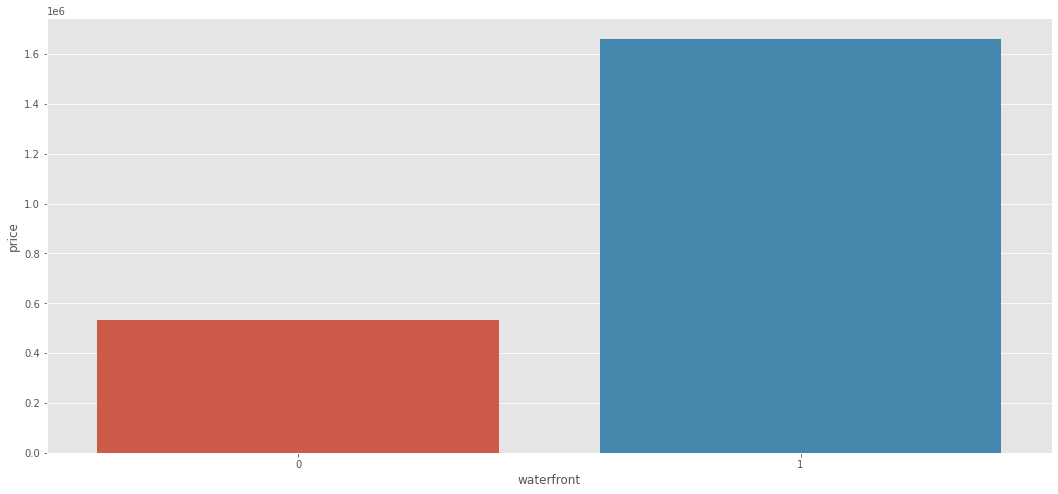

In [37]:
aux = price_mean(df4, 'waterfront')
sns.barplot(x='waterfront', y='price', data=aux);

### Hipótese 2 - A localidade do imóvel afeta no preço
**Verdadeiro**, pois a localidade afeta na média das preços

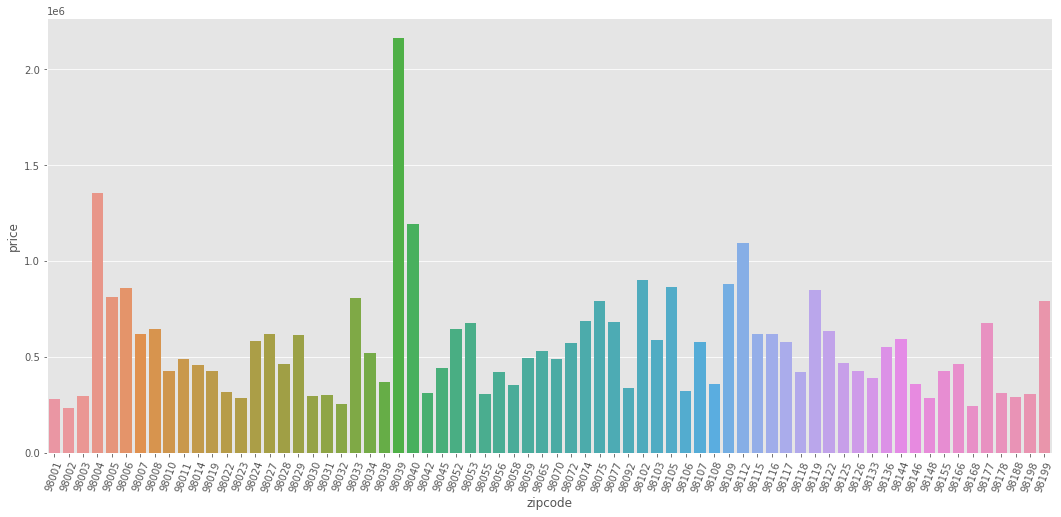

In [43]:
aux = price_mean(df4, 'zipcode')
sns.barplot(x='zipcode', y='price', data=aux)
plt.xticks(rotation=70);

### Hipótese 3 - Imóveis sem reforma custam menos
**Falso**, pois há imóveis que foram reformadados e que custam menos

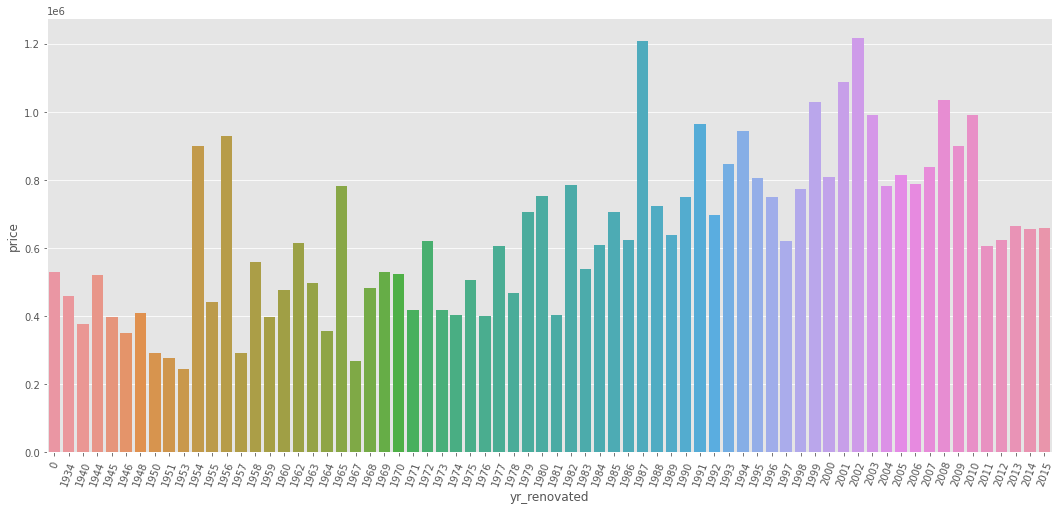

In [48]:
aux = price_mean(df4, 'yr_renovated')
sns.barplot(x='yr_renovated', y='price', data=aux)
plt.xticks(rotation=70);

### Hipótese 4 - Imóveis com a construção mais antigas são mais baratas
**Falso**, pois há imóveis com construção mais recente que custam menos

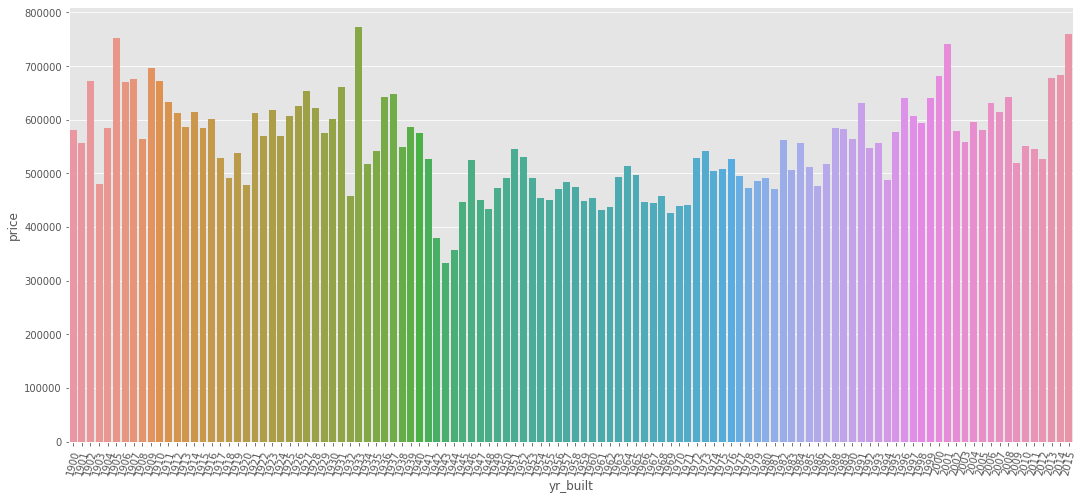

In [55]:
aux = price_mean(df4, 'yr_built')
sns.barplot(x='yr_built', y='price', data=aux)
plt.xticks(rotation=75);

### Hipótese 5 - Imóveis são mais caros no inverno
**Falso**, pois a média dos preços no inverno são menores

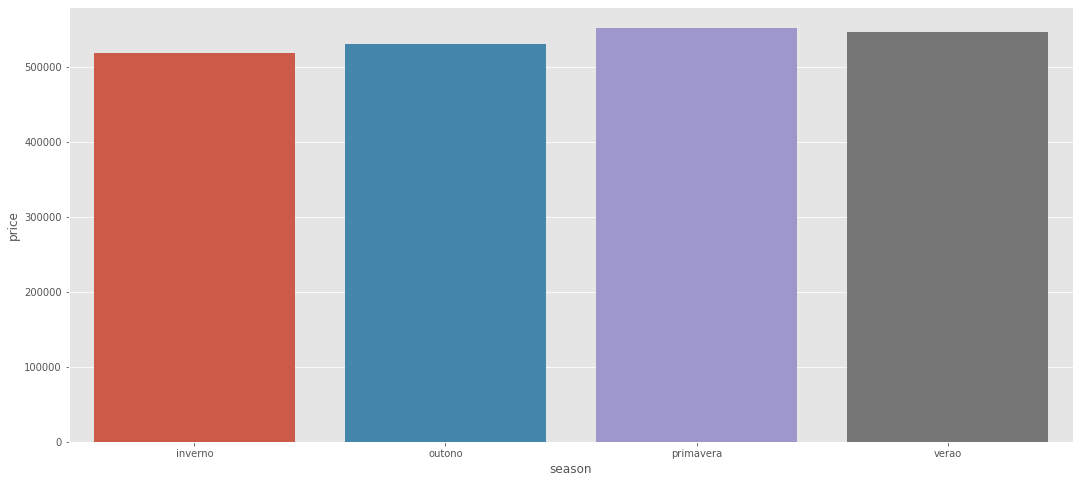

In [57]:
aux = price_mean(df4, 'season')
sns.barplot(x='season', y='price', data=aux);

### Hipótese 6 - Imóveis em piores condições são mais baratas
**Verdadeiro**, pois os imóveis de níveis 1 e 2 são aproximadamente metade do valor dos outro níveis, na média

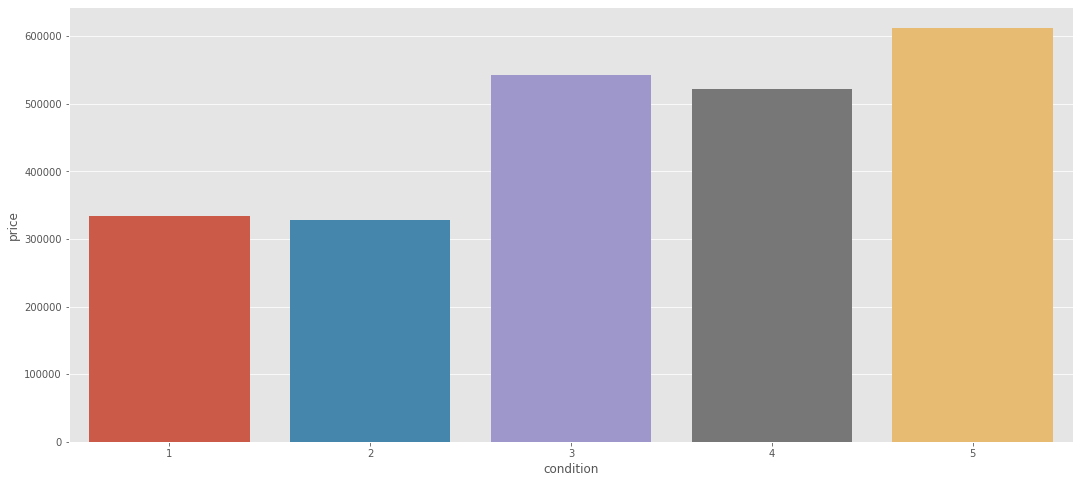

In [58]:
aux = price_mean(df4, 'condition')
sns.barplot(x='condition', y='price', data=aux);

### Hipótese 7 - Imóveis com mais de cômodos são mais caras
**Falso**, imóveis com mais banheiros costumam ser mais caros, porém, o mesmo não se aplica aos quartos

In [70]:
price_mean(df4, 'comodos').sort_values('price', ascending=False)

,comodos,price
142,banheiros: 8.0 / quartos: 6,7.700000e+06
141,banheiros: 7.75 / quartos: 6,6.885000e+06
133,banheiros: 6.0 / quartos: 6,5.300000e+06
138,banheiros: 6.75 / quartos: 5,4.668000e+06
130,banheiros: 5.75 / quartos: 5,3.745000e+06
...,...,...
5,banheiros: 0.75 / quartos: 0,2.650000e+05
2,banheiros: 0.5 / quartos: 1,2.550000e+05
6,banheiros: 0.75 / quartos: 1,2.510537e+05
10,banheiros: 1.0 / quartos: 0,2.280000e+05


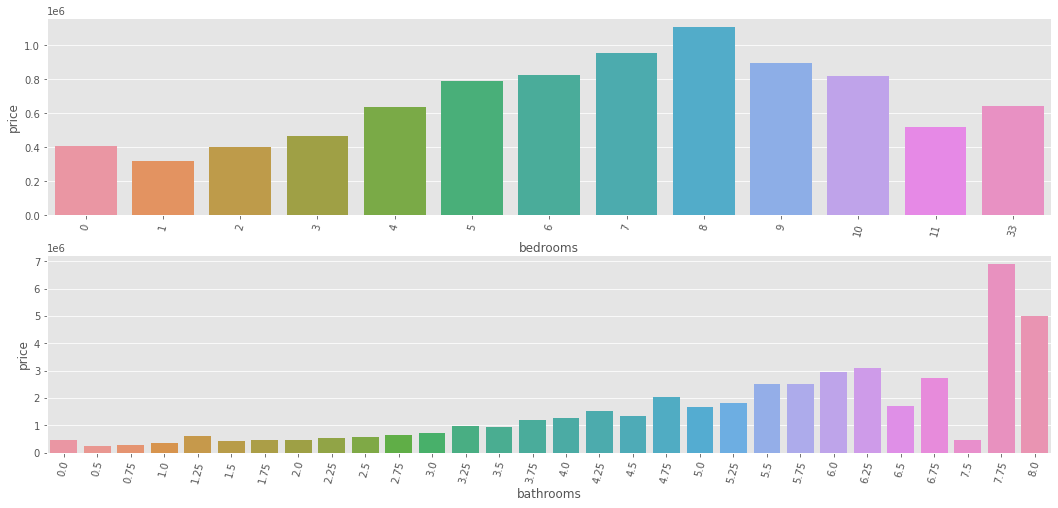

In [63]:
aux = price_mean(df4, 'bedrooms')
aux2 = price_mean(df4, 'bathrooms')

plt.subplot(2,1,1)
sns.barplot(x='bedrooms', y='price', data=aux)
plt.xticks(rotation=75)

plt.subplot(2,1,2)
sns.barplot(x='bathrooms', y='price', data=aux2)
plt.xticks(rotation=75);

### Hipótese 8 - O valor médio dos imóveis ficaram mais caras no decorrer dos meses
**Falso**, pois há meses em que a média dos preços caem

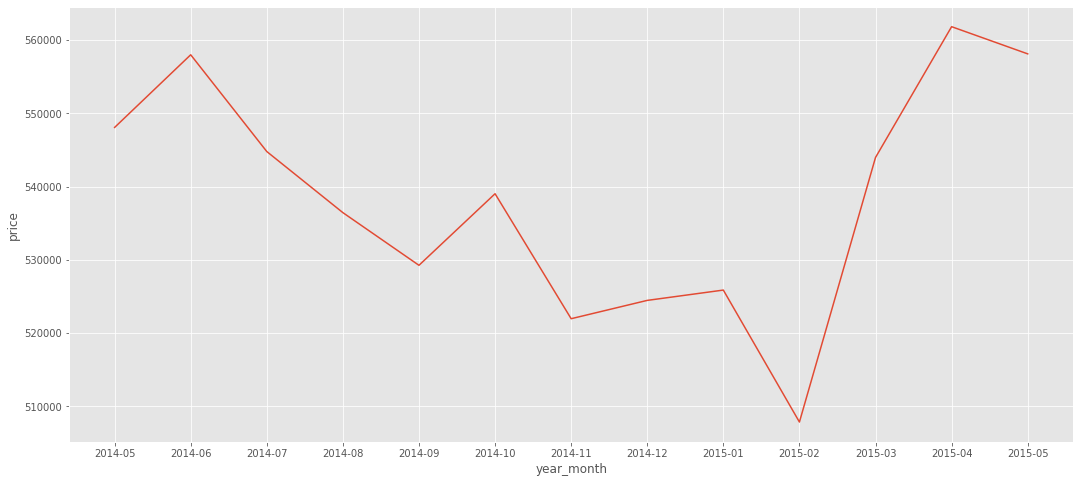

In [105]:
aux = price_mean(df4, 'year_month')
sns.lineplot(x='year_month', y='price', data=aux);